<a href="https://colab.research.google.com/github/Huin9/Huin9/blob/main/210818_TAAS_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_%EB%8F%85%EC%B7%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # 🚔🚘 TASS 교통사고분석시스템 🚘🚔

> ## **GIS 분석 - 교통사고분석시스템 접속**   
> - http://taas.koroad.or.kr/gis/mcm/mcl/initMap.do?menuId=GIS_GMP_STS_RSN
>    
>

> ## **사고년도 : 2018 ~ 2020년**  
>    - 시도 : 서울특별시  
>    - 시군구 : 도봉구  
>    - 조건설정 : 
    - [x] 사망사고
    - [x] 중상사고
    - [x] 경상사고
    - [x] 부상사고

> ## **F12 - Ctrl+F - "OpenLayers_Geometry_Point"**
> - \<circle id> 위의 \<g id>에 커서올리고 우클릭후 "Edit as HTML" 클릭  

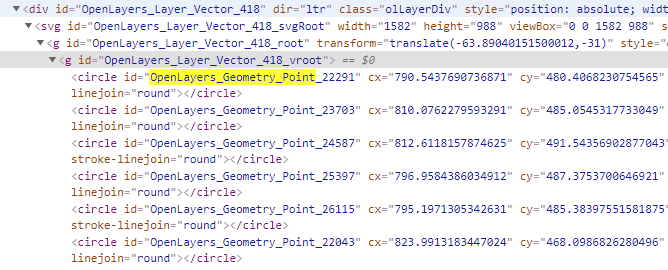

> - Ctrl+A (전체선택) - Ctrl+C (복사)
> - 메모장 키고 Ctrl+V(불어넣기) - 저장(accident.txt)

> ## **DATA ROAD**
> - `accident.txt`

In [ ]:
with open('accident.txt') as file :
    temp = file.readlines()

> ## 정규식 사용
> 정규식을 사용하여 아래와 같은 Format의 String만 리스트형태로 저장  
> circle id="OpenLayers_Geometry_Point_22291" cx="790.5437690736871" cy="480.4068230754565  
> https://regexper.com/#circle%5Csid%3D%2B%22%5Cw*%22%5Cscx%3D%22%5Cd*.%5Cd*%22%5Cscy%3D%22%5Cd*.%5Cd*%22

In [ ]:
import re

regex = r'circle\sid=+"\w*"\scx="\d*.\d*"\scy="\d*.\d*"'
result = re.findall(regex, temp[0])

import pandas as pd
pd.DataFrame(result).head()

,0
0,"circle id=""OpenLayers_Geometry_Point_22291"" cx..."
1,"circle id=""OpenLayers_Geometry_Point_23703"" cx..."
2,"circle id=""OpenLayers_Geometry_Point_24587"" cx..."
3,"circle id=""OpenLayers_Geometry_Point_25397"" cx..."
4,"circle id=""OpenLayers_Geometry_Point_26115"" cx..."


In [ ]:
regex = r'circle\sid=+"\w*"'
circle_id = re.findall(regex, temp[0])

regex = r'cx="\d*.\d*"'
cx = re.findall(regex, temp[0])

regex = r'cy="\d*.\d*"'
cy = re.findall(regex, temp[0])

In [ ]:
df = pd.DataFrame(columns=['circle_id','cx','cy'])
df['circle_id'] = circle_id
df['cx'] = cx
df['cy'] = cy
df.head()

,circle_id,cx,cy
0,"circle id=""OpenLayers_Geometry_Point_22291""","cx=""790.5437690736871""","cy=""480.4068230754565"""
1,"circle id=""OpenLayers_Geometry_Point_23703""","cx=""810.0762279593291""","cy=""485.0545317733049"""
2,"circle id=""OpenLayers_Geometry_Point_24587""","cx=""812.6118157874625""","cy=""491.54356902877043"""
3,"circle id=""OpenLayers_Geometry_Point_25397""","cx=""796.9584386034912""","cy=""487.3753700646921"""
4,"circle id=""OpenLayers_Geometry_Point_26115""","cx=""795.1971305342631""","cy=""485.38397551581875"""


In [ ]:
# " " 안에 있는 String만 추출하는 함수 작성
# circle id="OpenLayers_Geometry_Point_26115" -> OpenLayers_Geometry_Point_26115"
def extract_str(x) :
    return x[x.find('"')+1:-1]

for i in df.columns :
    df[i] = df[i].apply(extract_str)

In [ ]:
# dtype변환
df['cx'] = df['cx'].astype('float64')
df['cy'] = df['cy'].astype('float64')
df.head()

,circle_id,cx,cy
0,OpenLayers_Geometry_Point_22291,790.543769,480.406823
1,OpenLayers_Geometry_Point_23703,810.076228,485.054532
2,OpenLayers_Geometry_Point_24587,812.611816,491.543569
3,OpenLayers_Geometry_Point_25397,796.958439,487.375370
4,OpenLayers_Geometry_Point_26115,795.197131,485.383976


- cx, cy 좌표는 웹페이지의 디스플레이상 좌표일 뿐, 실제 좌표계의 좌표값을 가지지않는다

> ## 좌표계 독취 : BBOX
> - **F12 - Ctrl+F - "BBOX"**
> - 우클릭후 "Edit as HTML" 클릭 - 복사

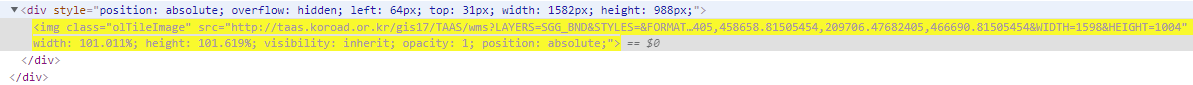

- DISPLAYPROJECTION=EPSG5181
- BBOX = 196922.47682405, 458658.81505454, 209706.47682405, 466690.81505454

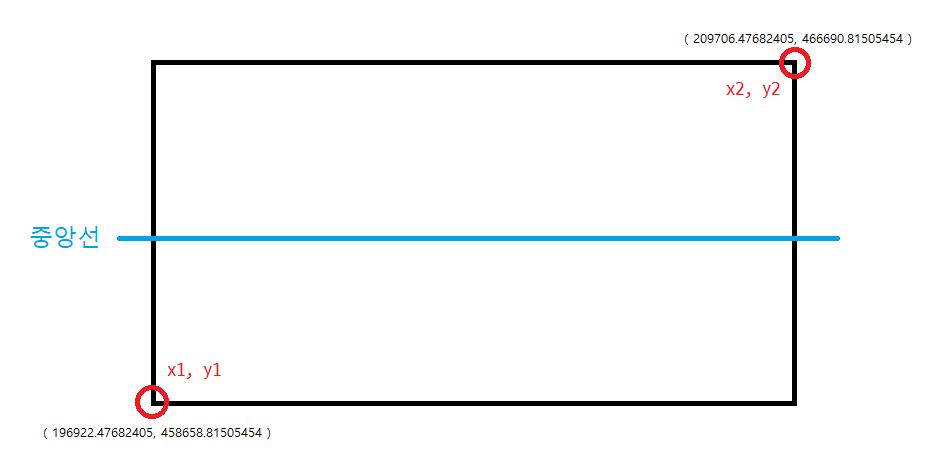

### BBOX 정보 입력

In [ ]:
# BBOX의 좌측하단 꼭지점의 좌표
BBOX_x1 = 196922.47682405
BBOX_y1 = 458658.81505454

# BBOX의 우측상단 꼭지점의 좌표
BBOX_x2 = 209706.47682405
BBOX_y2 = 458658.81505454

# BBOX의 중앙선
BBOX_m = (BBOX_y1+BBOX_y2)/2

### BBOX의 지도확대레벨 
- 웹페이지 확대 6단계로 놓으면 cx,cy의 8배를 곱해 더해주면 좌표계가 어느정도 일치한다.
- lat = '위도'
- lon = '경도'

In [ ]:
# 위경도
df['lat_temp'] = BBOX_x1 + df['cx']*8
df['lon_temp'] = BBOX_y1 + df['cy']*8
df.head()

,circle_id,cx,cy,lat_temp,lon_temp
0,OpenLayers_Geometry_Point_22291,790.543769,480.406823,203246.826977,462502.069639
1,OpenLayers_Geometry_Point_23703,810.076228,485.054532,203403.086648,462539.251309
2,OpenLayers_Geometry_Point_24587,812.611816,491.543569,203423.371350,462591.163607
3,OpenLayers_Geometry_Point_25397,796.958439,487.375370,203298.144333,462557.818015
4,OpenLayers_Geometry_Point_26115,795.197131,485.383976,203284.053868,462541.886859


- 이대로 좌표계에 올리면 y축의 중앙선을 기준으로 뒤집힌 모양으로 나온다
- 따라서, y축의 중앙선을 기준으로 다시 뒤집어주어야한다.

In [ ]:
def fix_y(y) :
    # y가 중앙선보다 크다면 (y-중앙선)만큼 중앙선에서 빼준다.
    if y > BBOX_m :
        return BBOX_m - (y - BBOX_m)
    # y가 중앙선보다 작다면 (중앙선-y)만큼 중앙선에서 더해준다.
    elif y < BBOX_m :
        return BBOX_m + (BBOX_m - y)
    else :
        return y

In [ ]:
df['lon_temp'] = df['lon_temp'].apply(fix_y)
df

,circle_id,cx,cy,lat_temp,lon_temp
0,OpenLayers_Geometry_Point_22291,790.543769,480.406823,203246.826977,454815.560470
1,OpenLayers_Geometry_Point_23703,810.076228,485.054532,203403.086648,454778.378800
2,OpenLayers_Geometry_Point_24587,812.611816,491.543569,203423.371350,454726.466502
3,OpenLayers_Geometry_Point_25397,796.958439,487.375370,203298.144333,454759.812094
4,OpenLayers_Geometry_Point_26115,795.197131,485.383976,203284.053868,454775.743250
...,...,...,...,...,...
2412,OpenLayers_Geometry_Point_26841,981.199591,777.007653,204772.073551,452442.753832
2413,OpenLayers_Geometry_Point_26849,1018.805576,817.573321,205072.921435,452118.228485
2414,OpenLayers_Geometry_Point_26865,853.839684,765.806819,203753.194294,452532.360503
2415,OpenLayers_Geometry_Point_26869,973.327272,121.540757,204709.095003,457686.488998


## 좌표계변환 : 5181 👉 4326

In [ ]:
from pyproj import Transformer
import pyproj
trans_5181_to_4326 = Transformer.from_crs("EPSG:5181","EPSG:4326")

In [ ]:
# lat, lon 빈리스트 생성
lat = []
lon = []

# lat, lon 에 5181에서 4326으로 변환된 좌표를 리스트에 넣어줍니다.
for i in range(df.shape[0]):
    x = df['lon_temp'][i]
    y = df['lat_temp'][i]
    x_t, y_t = trans_5181_to_4326.transform(x, y)
    lat.append(x_t)
    lon.append(y_t)

In [ ]:
# 변환된 4326 좌표를 df의 칼럼으로 추가합니다.
df['lat'] = lat
df['lon'] = lon
df.head()

,circle_id,cx,cy,lat_temp,lon_temp,lat,lon
0,OpenLayers_Geometry_Point_22291,790.543769,480.406823,203246.826977,454815.560470,37.592900,127.036764
1,OpenLayers_Geometry_Point_23703,810.076228,485.054532,203403.086648,454778.378800,37.592565,127.038533
2,OpenLayers_Geometry_Point_24587,812.611816,491.543569,203423.371350,454726.466502,37.592097,127.038762
3,OpenLayers_Geometry_Point_25397,796.958439,487.375370,203298.144333,454759.812094,37.592398,127.037345
4,OpenLayers_Geometry_Point_26115,795.197131,485.383976,203284.053868,454775.743250,37.592541,127.037185


## 좌표 수정 (노가다 작업😥) 

In [ ]:
import folium

lon = df['lon'].mean() - 0.00501 
lat = df['lat'].mean() + 0.0740 

m = folium.Map(
    location=[lat,lon],
    zoom_start=15
)

# 이 부분 계속 수정하면서 맞는 좌표를 찾는다 #
coords = []
for i in range(df.shape[0]):
    x = df['lon'][i] - 0.00501   # x축
    y = df['lat'][i] + 0.0740    # y축
    coords.append([y, x])

for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 1,
        color = '#000000',
        fill = 'crimson',
    ).add_to(m)

m

## 최종결과물
- http://taas.koroad.or.kr/gis/mcm/mcl/initMap.do?menuId=GIS_GMP_STS_RSN#
- 목록보기 클릭 - Excel 출력 - 'accidentInfoList.xls'파일 저장됨
- 교통사고 엑셀파일을 csv파일로 저장하고 불러옵니다
- df_info : accidentInfoList.csv

In [ ]:
# 교통
df_info = pd.read_csv('accidentInfoList.csv', encoding="CP949")

# 수정된 좌표값[lat, lon]을 df_info에 추가합니다.
df_info['lat'] = df['lat'] + 0.0740 
df_info['lon'] = df['lon'] - 0.00501

# 최종결과물을 저장합니다.
df_info.to_csv('도봉구_교통사고.csv')